<a href="https://colab.research.google.com/github/MaLuWi/guayas_store_project/blob/main/Time_Series_Project_EDA_Masterschool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
# Note: train file is very large.
# To make sure we fit RAM avaible on Google-Colab, we will load only part of the file
df_train = pd.read_csv('/content/drive/MyDrive/Time Series/df_train_filtered.csv') #this is the dataset after filtering out for the Guayas region and top3 familys
df_stores = pd.read_csv('/content/drive/MyDrive/Time Series/stores.csv')
df_items = pd.read_csv('/content/drive/MyDrive/Time Series/items.csv')
df_transactions = pd.read_csv('/content/drive/MyDrive/Time Series/transactions.csv')
df_oil = pd.read_csv('/content/drive/MyDrive/Time Series/oil.csv')
df_holidays_events = pd.read_csv('/content/drive/MyDrive/Time Series/holidays_events.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-1-6170f4fc4e85>:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('/content/drive/MyDrive/Time Series/df_train_filtered.csv') #this is the dataset after filtering out for the Guayas region and top3 familys


# **Checking the datasets structure**

In [2]:
df_train.shape

(14745768, 6)

In [3]:
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,18790,2013-01-02,24,105574,12.0,NaN
1,18791,2013-01-02,24,105575,2.0,NaN
2,18792,2013-01-02,24,105577,1.0,NaN
3,18793,2013-01-02,24,105693,7.0,NaN
4,18794,2013-01-02,24,105737,17.0,NaN


In [4]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [5]:
df_holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [6]:
df_items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [7]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [8]:
df_oil.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [9]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


# **Datacleaning and Feature Engineering**

In [10]:
df_train.info() #in large datasets pandas skips counting non-null values to save time and memory
#Pandas automatically set onpromotion to 'object' because it contained: "False", "True", NaN - and could not understand if it's a bool or string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14745768 entries, 0 to 14745767
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   item_nbr     int64  
 4   unit_sales   float64
 5   onpromotion  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 675.0+ MB


In [11]:
df_train.isnull().sum()

,0
id,0
date,0
store_nbr,0
item_nbr,0
unit_sales,0
onpromotion,2747275


In [12]:
df_train['onpromotion'] = df_train['onpromotion'].fillna(False).astype(bool) #first to bool.
df_train['onpromotion'] = df_train['onpromotion'].astype(int) #ML models work best with numbers + important for memory optimization
df_train.head()

<ipython-input-12-f663caae6815>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['onpromotion'] = df_train['onpromotion'].fillna(False).astype(bool) #first to bool.


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,18790,2013-01-02,24,105574,12.0,0
1,18791,2013-01-02,24,105575,2.0,0
2,18792,2013-01-02,24,105577,1.0,0
3,18793,2013-01-02,24,105693,7.0,0
4,18794,2013-01-02,24,105737,17.0,0


In [13]:
df_train.isnull().sum()

,0
id,0
date,0
store_nbr,0
item_nbr,0
unit_sales,0
onpromotion,0


In [14]:
#Checking for negative sales which indicate product returns.
negative_sales = df_train[df_train['unit_sales'] < 0]
negative_sales.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
13289,106658,2013-01-04,34,586824,-2.0,0
38690,309805,2013-01-09,35,1079215,-8.0,0
45715,382905,2013-01-11,27,1097187,-20.0,0
68451,564108,2013-01-15,51,627885,-36.0,0
94237,787522,2013-01-21,24,211205,-5.0,0


In [15]:
negative_sales.shape

(794, 6)

In [16]:
#Replacing negative sales with 0 to reflect returns as non-sales
df_train['unit_sales'] = df_train['unit_sales'].apply(lambda x: max(x, 0))

In [17]:
# Function to calculate Z-score for each group (store-item combination)
def calculate_store_item_zscore(group):
    # Compute mean and standard deviation for each store-item group
    mean_sales = group['unit_sales'].mean()
    std_sales = group['unit_sales'].std()

    # Calculate Z-score (avoiding division by zero for standard deviation)
    group['z_score'] = (group['unit_sales'] - mean_sales) / (std_sales if std_sales != 0 else 1)
    return group


In [18]:
# Apply the Z-score calculation to each store-item group without resetting the index
df_train_grouped = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_store_item_zscore)
df_train_grouped.reset_index(drop=True, inplace=True)

<ipython-input-18-faa2e1e437f8>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train_grouped = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_store_item_zscore)


In [19]:
# Define threshold for outliers (e.g., Z-score > 5)
outliers = df_train_grouped[df_train_grouped['z_score'] > 5]

# Print summary
print(f"Number of outliers detected: {len(outliers)}")
outliers.head()
 # We calculate Z-scores to identify unusually high sales that could skew model training. These are flagged as outliers but not removed, as they may represent valid high-demand day

Number of outliers detected: 48485


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,z_score
188,15666702,2013-12-18,24,96995,14.0,0,7.946399
286,59775862,2015-10-20,24,99197,14.0,0,5.822016
289,60322807,2015-10-26,24,99197,19.0,0,8.276173
721,15717753,2013-12-19,24,103520,27.0,0,6.642670
770,18886543,2014-02-13,24,103520,22.0,0,5.154400


In [20]:
outliers.shape

(48485, 7)

In [21]:
# Convert 'date' column to datetime format
df_train['date'] = pd.to_datetime(df_train['date'])

# Get the minimum and maximum dates in the dataset to create a full date range
min_date = df_train['date'].min()
max_date = df_train['date'].max()

# Get full date range
full_date_range = pd.DataFrame({'date': pd.date_range(min_date, max_date, freq='D')})
full_date_range

,date
0,2013-01-02
1,2013-01-03
2,2013-01-04
3,2013-01-05
4,2013-01-06
...,...
1682,2017-08-11
1683,2017-08-12
1684,2017-08-13
1685,2017-08-14


In [22]:
#Ok, now we have a list of all dates between the min and max date in our dataset! Next, let's create a DataFrame with all (store, item, date) combinations
# Create a DataFrame with all (store, item, date) combinations
store_item_combinations = df_train[['store_nbr', 'item_nbr']].drop_duplicates() #This gives a DataFrame of all unique store-item pairs in df_train
all_combinations = store_item_combinations.merge(full_date_range, how='cross') #This creates a Cartesian product: Every store-item pair × every date in the range
all_combinations
# Why are we doing this?
#Because for time series forecasting, you need a complete time-indexed dataset, even for days with no sales, to ensure continuity
#This allows you to:
#->Fill missing dates
#->Set zero sales on dates with no transactions
#->Handle seasonality and lags correctly

,store_nbr,item_nbr,date
0,24,105574,2013-01-02
1,24,105574,2013-01-03
2,24,105574,2013-01-04
3,24,105574,2013-01-05
4,24,105574,2013-01-06
...,...,...,...
35069351,51,2123791,2017-08-11
35069352,51,2123791,2017-08-12
35069353,51,2123791,2017-08-13
35069354,51,2123791,2017-08-14


In [23]:
# Merge with original data to fill missing dates
df_filled = all_combinations.merge(df_train, on=['store_nbr', 'item_nbr', 'date'], how='left') # Any missing sales will show as NaN in the unit_sales column after this.

# Fill missing sales values with 0
df_filled['unit_sales'] = df_filled['unit_sales'].fillna(0) #If a store-item-date combo had no recorded sale, this sets the value to zero.

# Check the first few rows
df_filled.head(5)

,store_nbr,item_nbr,date,id,unit_sales,onpromotion
0,24,105574,2013-01-02,18790.0,12.0,0.0
1,24,105574,2013-01-03,59692.0,1.0,0.0
2,24,105574,2013-01-04,99664.0,3.0,0.0
3,24,105574,2013-01-05,140805.0,4.0,0.0
4,24,105574,2013-01-06,182800.0,7.0,0.0


In [24]:
df_train = df_filled
del df_filled

In [25]:
#Feature engineering
# Convert date column to datetime
df_train['date'] = pd.to_datetime(df_train['date'])

# Creating new time-based features - These time features capture temporal seasonality, weekly patterns, and monthly cycles
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['day_of_week'] = df_train['date'].dt.dayofweek

In [26]:
# Calculating rolling average of unit_sales
df_train['unit_sales_7d_avg'] = df_train.groupby(['item_nbr', 'store_nbr'])['unit_sales'].transform(lambda x: x.rolling(window=7).mean())
#A 7-day rolling average smooths short-term fluctuations and helps the model understand recent trends

In [27]:
df_train.head(10) #Look, for the first days we have no values in the 'unit_sales_7d_avg' column. This is because we used the window size that is equal to 7

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg
0,24,105574,2013-01-02,18790.0,12.0,0.0,2013,1,2,2,NaN
1,24,105574,2013-01-03,59692.0,1.0,0.0,2013,1,3,3,NaN
2,24,105574,2013-01-04,99664.0,3.0,0.0,2013,1,4,4,NaN
3,24,105574,2013-01-05,140805.0,4.0,0.0,2013,1,5,5,NaN
4,24,105574,2013-01-06,182800.0,7.0,0.0,2013,1,6,6,NaN
5,24,105574,2013-01-07,223895.0,3.0,0.0,2013,1,7,0,NaN
6,24,105574,2013-01-08,263107.0,3.0,0.0,2013,1,8,1,4.714286
7,24,105574,2013-01-09,302232.0,7.0,0.0,2013,1,9,2,4.000000
8,24,105574,2013-01-10,341031.0,3.0,0.0,2013,1,10,3,4.285714
9,24,105574,2013-01-11,379570.0,6.0,0.0,2013,1,11,4,4.714286


In [28]:
#downcast numerical columns and convert object types to categories to significantly reduce memory usage
df_train['store_nbr'] = df_train['store_nbr'].astype('category')
df_train['item_nbr'] = df_train['item_nbr'].astype('category')
df_train['unit_sales'] = df_train['unit_sales'].astype('float32')
df_train['onpromotion'] = df_train['onpromotion'].fillna(0).astype('int8')  # Assuming onpromotion might have NaNs
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['year'] = df_train['date'].dt.year.astype('int16')
df_train['month'] = df_train['date'].dt.month.astype('int8')
df_train['day'] = df_train['date'].dt.day.astype('int8')
df_train['day_of_week'] = df_train['date'].dt.dayofweek.astype('int8')

In [29]:
# Ensure date columns are in datetime format across all datasets
df_holidays_events['date'] = pd.to_datetime(df_holidays_events['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

In [30]:
#drop id
df_train = df_train.drop(columns=['id'])

In [31]:
for lag in (1, 7, 14):
   df_train[f"lag_{lag}"] = (
        df_train
          .groupby(['store_nbr','item_nbr'])['unit_sales']
          .shift(lag)
          .astype('float32', copy=False)
    )
 #Lag features help capture autocorrelation and previous demand patterns

<ipython-input-31-26775590a18a>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['store_nbr','item_nbr'])['unit_sales']
<ipython-input-31-26775590a18a>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['store_nbr','item_nbr'])['unit_sales']
<ipython-input-31-26775590a18a>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['store_nbr','item_nbr'])['unit_sales']


In [32]:
#Measures sales volatility over the past 7 days, which can help models learn to predict based on demand consistency or fluctuation.
df_train['unit_sales_7d_avg'] = \
    df_train['unit_sales_7d_avg'] \
      .astype('float32', copy=False)

In [33]:
#Measures sales volatility over the past 7 days, which can help models learn to predict based on demand consistency or fluctuation.
df_train['roll7_std'] = (
    df_train
      .groupby(['store_nbr','item_nbr'])['unit_sales']
      .transform(lambda x: x.rolling(7).std())
      .astype('float32', copy=False)
)

<ipython-input-33-04b0d1b11f08>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['store_nbr','item_nbr'])['unit_sales']


In [34]:
# Adds an indicator for holidays, as demand often spikes or drops during such events.
hol = (df_holidays_events[['date']]
       .drop_duplicates()
       .assign(is_holiday=1))
df_train = df_train.merge(hol, on='date', how='left')
df_train['is_holiday'] = df_train['is_holiday'].fillna(0).astype('int8', copy=False)

In [35]:
#Measures the week-over-week growth or decline in sales—useful to model short-term trends.
import numpy as np
df_train['pct_chg_7d'] = (
     (df_train['unit_sales'] - df_train['lag_7'])
     .div(df_train['lag_7'].replace(0, np.nan))
     .fillna(0)
     .astype('float32', copy=False)
)

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35069356 entries, 0 to 35069355
Data columns (total 16 columns):
 #   Column             Dtype         
---  ------             -----         
 0   store_nbr          category      
 1   item_nbr           category      
 2   date               datetime64[ns]
 3   unit_sales         float32       
 4   onpromotion        int8          
 5   year               int16         
 6   month              int8          
 7   day                int8          
 8   day_of_week        int8          
 9   unit_sales_7d_avg  float32       
 10  lag_1              float32       
 11  lag_7              float32       
 12  lag_14             float32       
 13  roll7_std          float32       
 14  is_holiday         int8          
 15  pct_chg_7d         float32       
dtypes: category(2), datetime64[ns](1), float32(7), int16(1), int8(5)
memory usage: 1.5 GB


# **EDA**

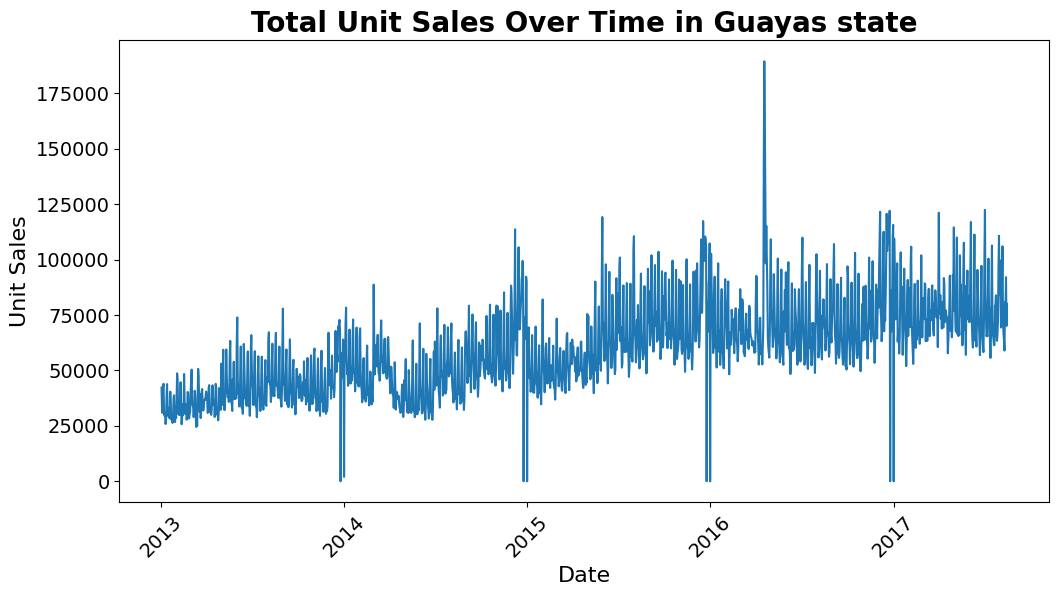

In [37]:
# Aggregating total sales by date
sales_by_date = df_train.groupby('date')['unit_sales'].sum()

# Plotting the time-series
plt.figure(figsize=(12,6))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.title('Total Unit Sales Over Time in Guayas state', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Unit Sales', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.show()
#First look at whether sales are trending upward, downward, or are stable.
#Shows the overall trend (upward/downward/flat) and highlights any major structural shifts or outliers

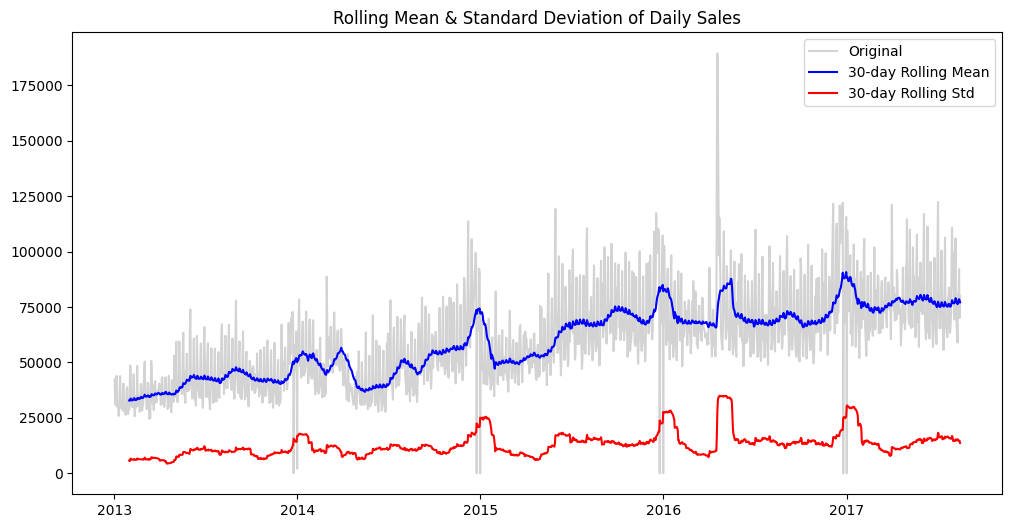

In [38]:
daily_sales = df_train.groupby('date')['unit_sales'].sum()
rolling_mean = daily_sales.rolling(window=30).mean()
rolling_std = daily_sales.rolling(window=30).std()

plt.figure(figsize=(12,6))
plt.plot(daily_sales, color='lightgray', label='Original')
plt.plot(rolling_mean, color='blue', label='30-day Rolling Mean')
plt.plot(rolling_std, color='red', label='30-day Rolling Std')
plt.title("Rolling Mean & Standard Deviation of Daily Sales")
plt.legend()
plt.show()
#Plotting rolling statistics
#Useful for: Stationarity checks and understanding how stable the time series is

In [39]:
# Aggregating sales by year and month
sales_by_month = df_train.groupby(['year', 'month'])['unit_sales'].sum().unstack()

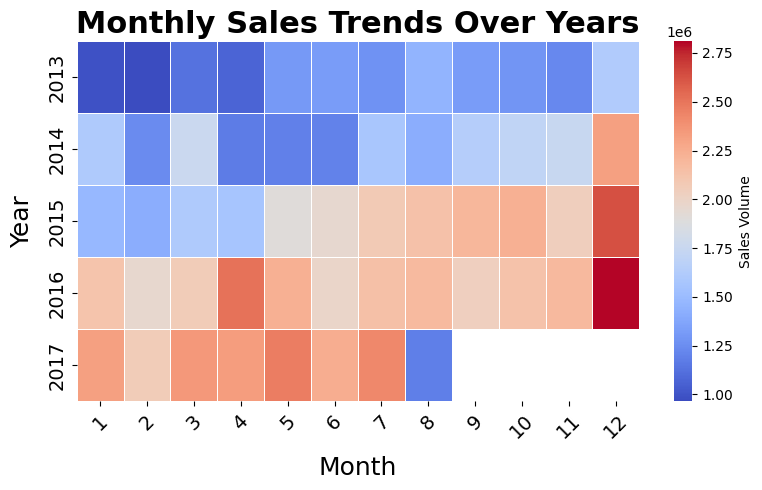

In [40]:
import seaborn as sns

plt.figure(figsize=(8, 5))  # Increase figure size for better visibility
sns.heatmap(
    sales_by_month,
    cmap='coolwarm',  # Use a diverging colormap for better contrast
    linewidths=0.5,  # Add lines between cells for clarity
    linecolor='white',  # Use white lines for a cleaner look
    cbar_kws={'label': 'Sales Volume'}  # Add a descriptive colorbar label
)

# Customizing title and axes labels
plt.title('Monthly Sales Trends Over Years', fontsize=22, fontweight='bold')
plt.xlabel('Month', fontsize=18, labelpad=10)  # Labelpad adds spacing
plt.ylabel('Year', fontsize=18, labelpad=10)

# Formatting tick labels
plt.xticks(fontsize=14, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Display the heatmap
plt.show()
#Reveals seasonal patterns at the yearly and monthly level, showing which months consistently over- or under-perform.
#Visualizes monthly seasonality across years
#Helps identify which months are peak/low sales consistently over time

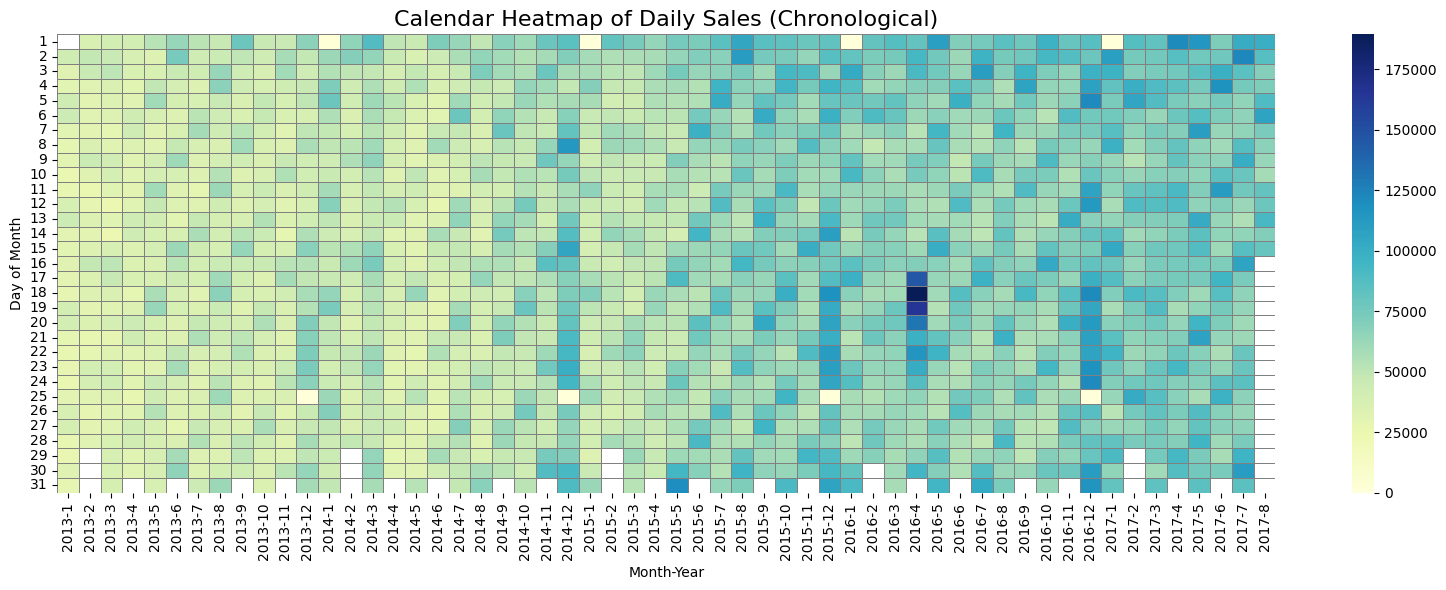

In [41]:
# Aggregate daily sales
calendar_df = df_train.groupby('date')['unit_sales'].sum().reset_index()

# Extract calendar components
calendar_df['year'] = calendar_df['date'].dt.year
calendar_df['month'] = calendar_df['date'].dt.month
calendar_df['day'] = calendar_df['date'].dt.day

# Pivot table: rows = day of month, columns = (month, year)
pivot = calendar_df.pivot_table(index='day', columns=['year', 'month'], values='unit_sales')

# Sort columns by (year, month)
pivot = pivot.sort_index(axis=1, level=[0, 1])  # Level 0 = year, Level 1 = month

# Plot heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title("Calendar Heatmap of Daily Sales (Chronological)", fontsize=16)
plt.xlabel("Month-Year")
plt.ylabel("Day of Month")
plt.tight_layout()
plt.show()

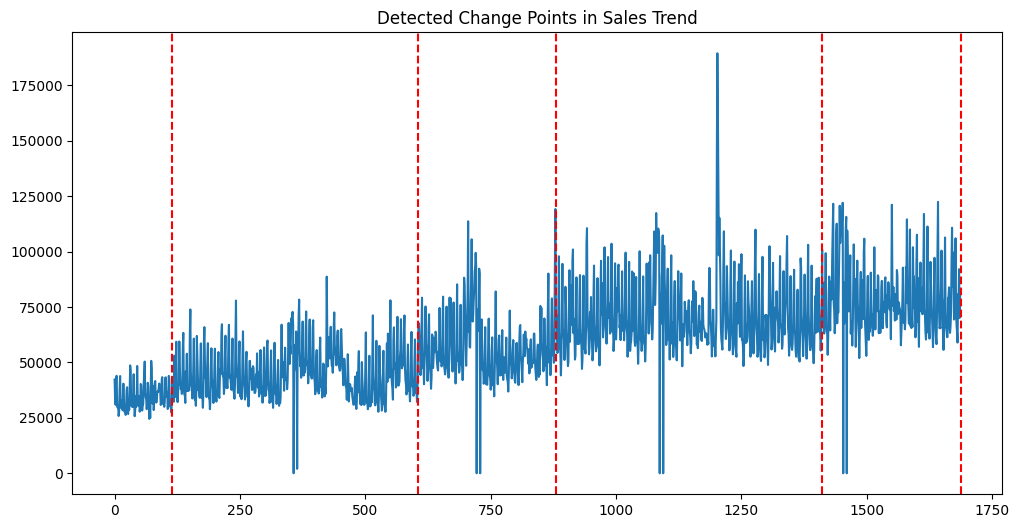

In [42]:
!pip install ruptures
import ruptures as rpt

# Use sales data for detection
signal = daily_sales.values
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)

# Plot detected change points
plt.figure(figsize=(12, 6))
plt.plot(signal)
for cp in result:
    plt.axvline(cp, color='red', linestyle='--')
plt.title("Detected Change Points in Sales Trend")
plt.show()
#Identifies points where the time series behavior significantly changes (mean/variance shift)
#Useful to detect changes — policy effects, economic events, disruptions, or promotion campaigns

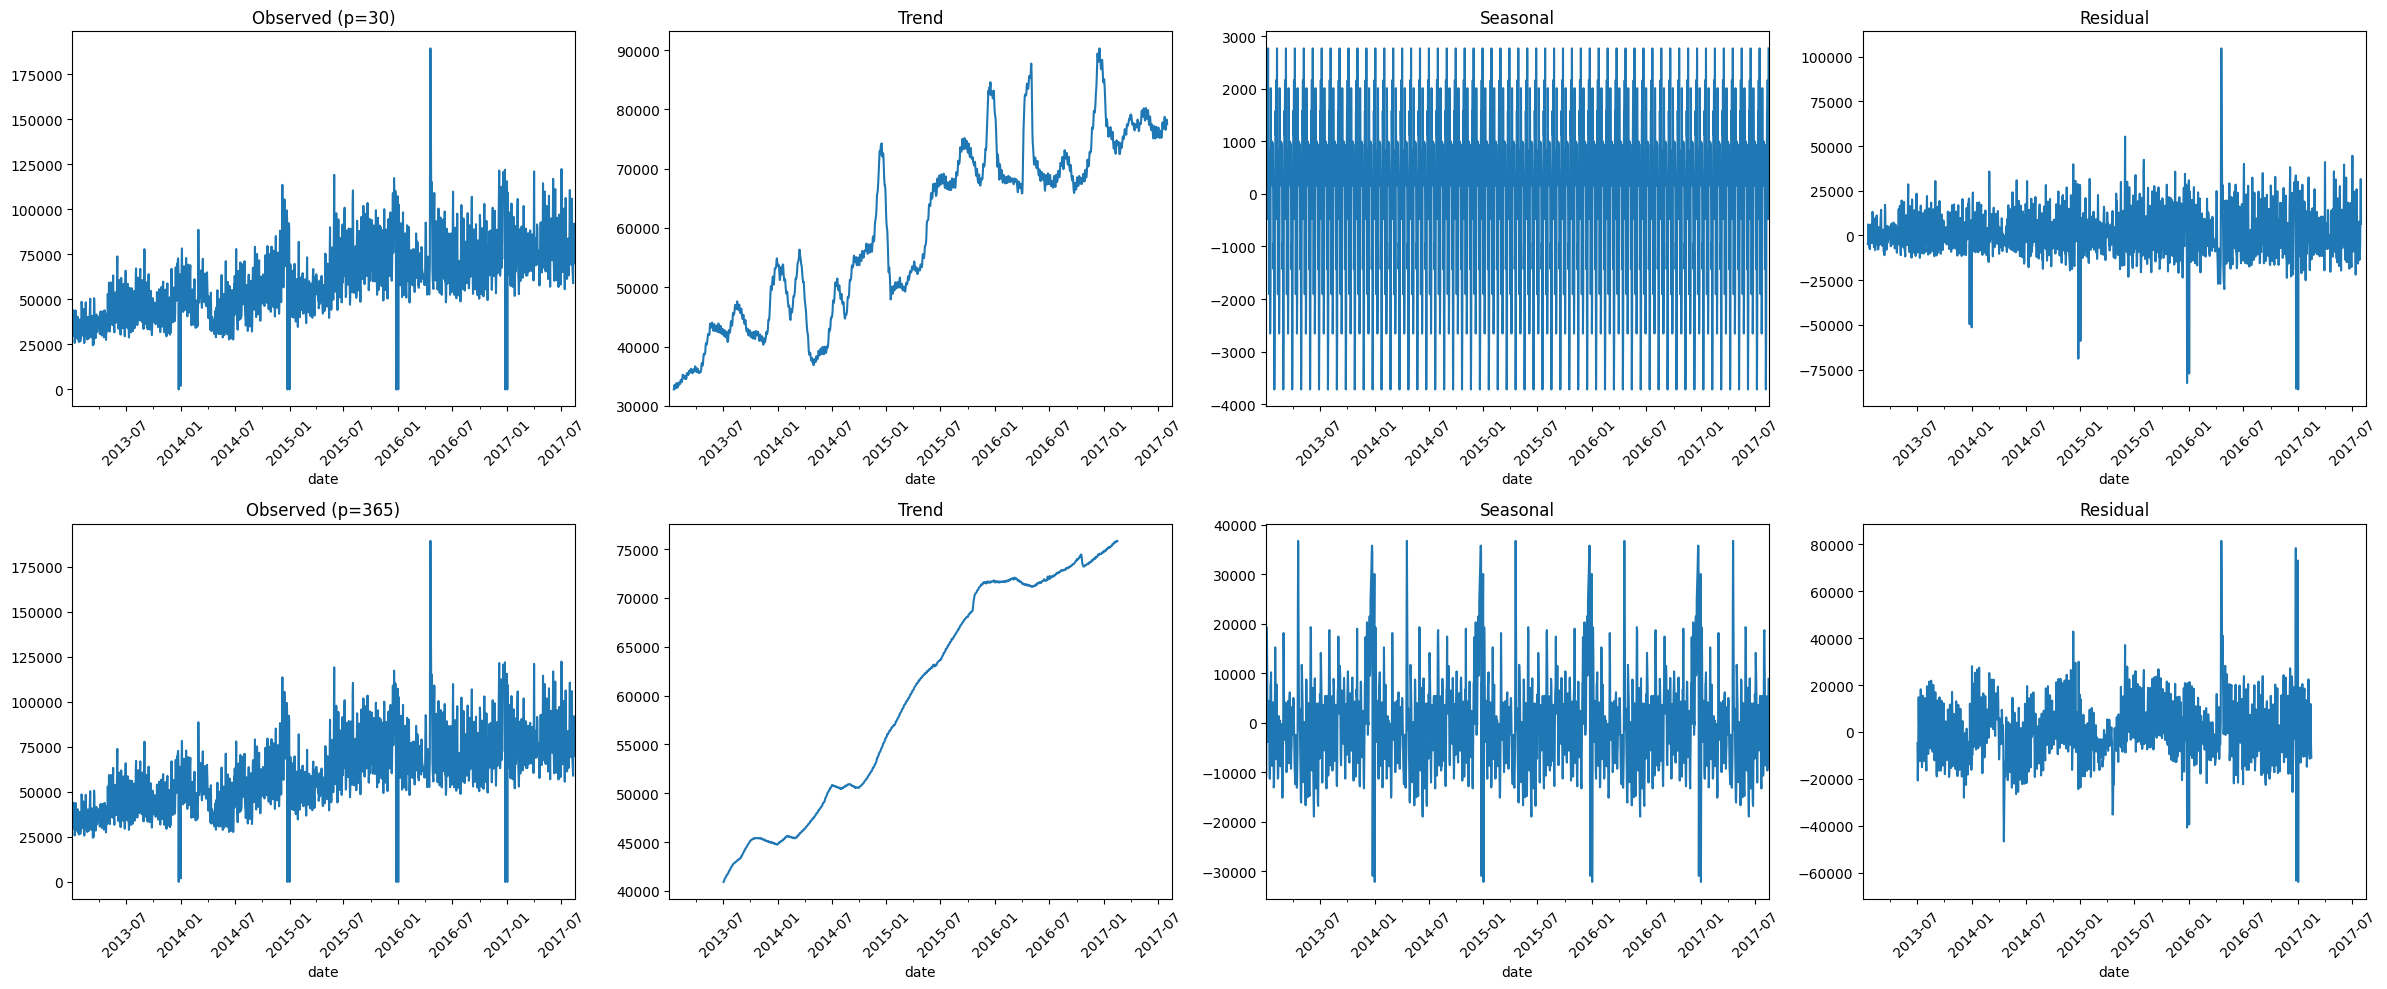

In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

# 1) Build your daily_sales series:
daily_sales = df_train.groupby('date')['unit_sales'].sum()

# 2) Then run the multi-period decomposition:
periods = [30, 365]
fig, axes = plt.subplots(len(periods), 4, figsize=(24, 5*len(periods)))

for i, p in enumerate(periods):
    dec = seasonal_decompose(daily_sales, model='additive', period=p)

    dec.observed.plot(ax=axes[i,0], title=f'Observed (p={p})')
    dec.trend   .plot(ax=axes[i,1], title='Trend')
    dec.seasonal.plot(ax=axes[i,2], title='Seasonal')
    dec.resid   .plot(ax=axes[i,3], title='Residual')

    for ax in axes[i]:
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

#Separates the series into its additive components: long-term trend, repeating seasonal cycle, and random noise
#The seasonal component exhibits strong, repeating patterns, indicating clear yearly seasonality
#we see a very strong increasing trend over the years, highlighting long-term growth

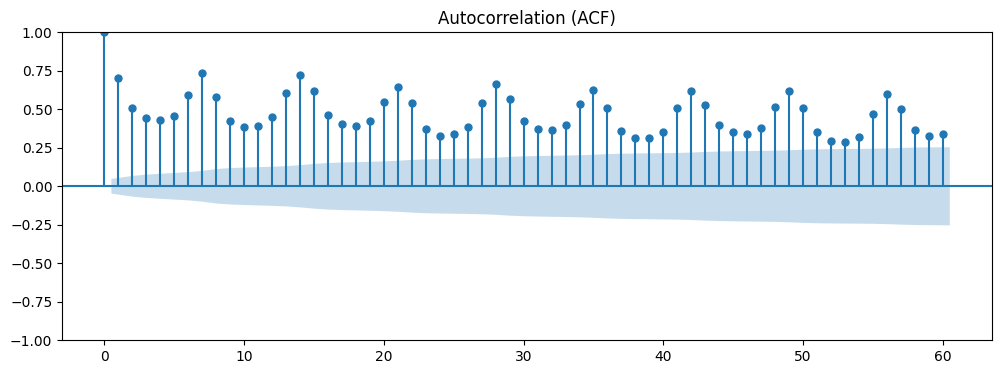

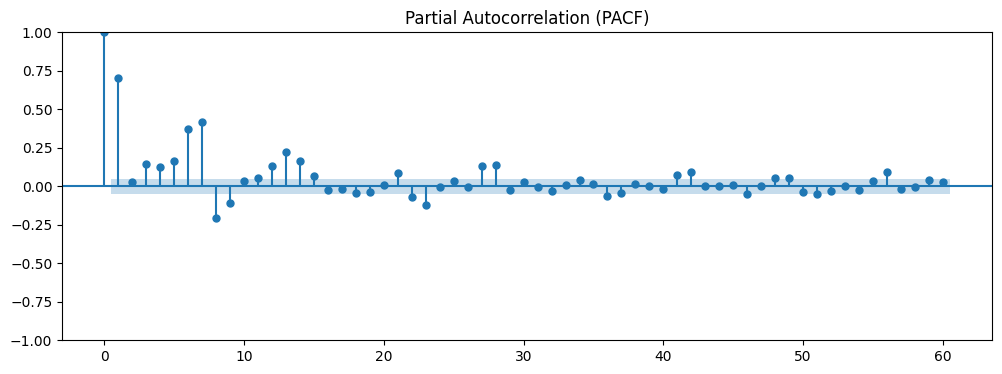

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 4))
plot_acf(daily_sales, lags=60, ax=plt.gca())
plt.title("Autocorrelation (ACF)")
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(daily_sales, lags=60, ax=plt.gca(), method='ywm')
plt.title("Partial Autocorrelation (PACF)")
plt.show()
#ACF shows how past values correlate over different lags; PACF isolates the direct effect of each lag
#Useful for choosing AR/MA terms in time series models like ARIMA

In [45]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_sales.dropna())
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
if result[1] < 0.05:
    print("Stationary")
else:
    print("Non-Stationary")
#Statistically tests whether the series has a unit root (non-stationary) or is stationary

ADF Statistic: -2.8748
p-value: 0.0484
Stationary


<ipython-input-46-a19ef624413c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_sales = df_train.groupby('store_nbr')['unit_sales'].sum().sort_values(ascending=False)


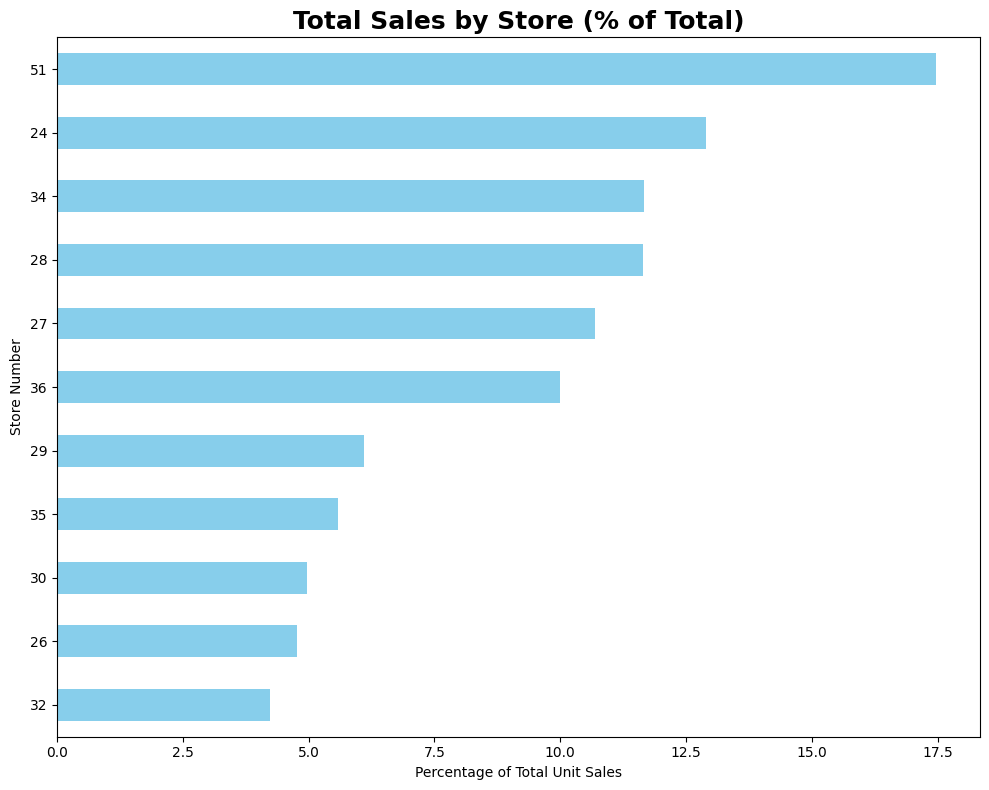

In [46]:
# Calculate total sales per store
store_sales = df_train.groupby('store_nbr')['unit_sales'].sum().sort_values(ascending=False)

# Convert to percentage of total
store_sales_pct = (store_sales / store_sales.sum()) * 100

# Plot
store_sales_pct.plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title('Total Sales by Store (% of Total)', fontsize=18, fontweight='bold')
plt.xlabel('Percentage of Total Unit Sales')
plt.ylabel('Store Number')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()
#Ranks stores by overall contribution, identifying the “heavy hitters.”
#Benefits: Can guide model scope and resource allocation depending on the goals (e.g. focus on top 20 % of stores).

In [47]:
# Calculate cumulative percentage
cumulative_pct = store_sales_pct.cumsum()

# Find the first index where cumulative percentage exceeds 80
stores_80pct = (cumulative_pct >= 80).idxmax()  # idxmax() gives the first index where cumulative >= 80

# Now, get the position (how many stores)
stores_80pct_position = cumulative_pct.index.get_loc(stores_80pct) + 1  # +1 because index is 0-based

print(f"Number of stores that make up 80% of total sales: {stores_80pct_position} out of {store_sales.size}")
#Quantifies exactly how many stores drive the bulk of volume
#if wanted one could focus on this subset

Number of stores that make up 80% of total sales: 7 out of 11


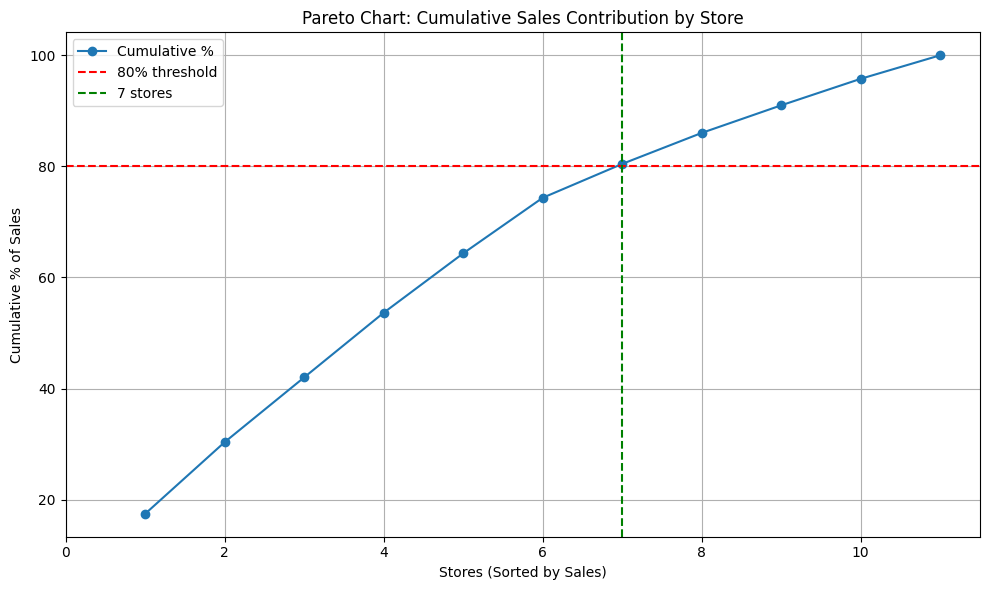

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_pct) + 1), cumulative_pct.values, marker='o', label='Cumulative %')
plt.axhline(y=80, color='red', linestyle='--', label='80% threshold')
plt.axvline(x=stores_80pct_position, color='green', linestyle='--', label=f'{stores_80pct_position} stores')
plt.title('Pareto Chart: Cumulative Sales Contribution by Store')
plt.xlabel('Stores (Sorted by Sales)')
plt.ylabel('Cumulative % of Sales')
plt.xticks(range(0, len(cumulative_pct)+1, 2))  # Show every 2nd store for clean x-axis
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#Quantifies exactly how many stores drive the bulk of volume

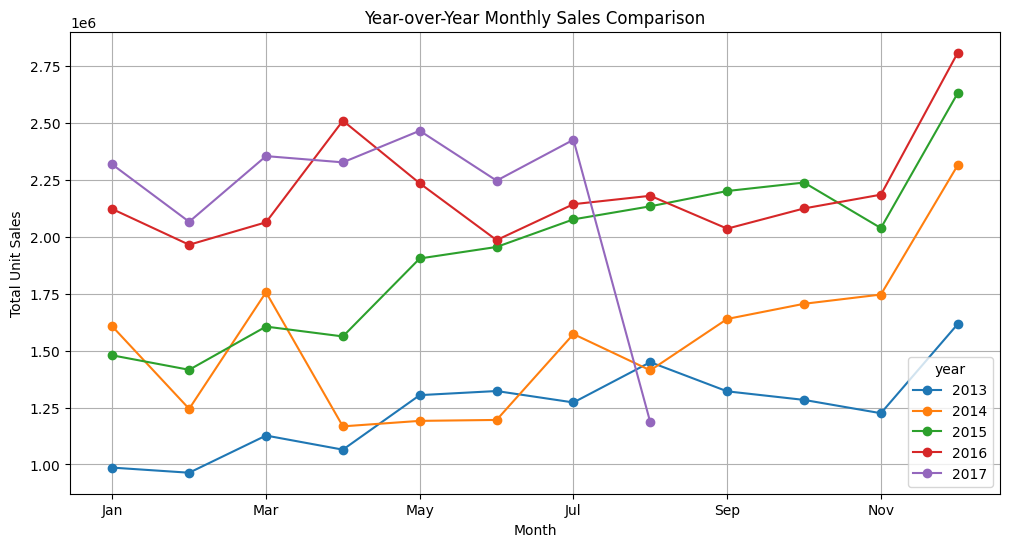

In [49]:
df_train['month_name'] = df_train['date'].dt.strftime('%b')
yoy_sales = df_train.groupby(['month_name', 'year'])['unit_sales'].sum().unstack()
yoy_sales = yoy_sales.loc[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

yoy_sales.plot(figsize=(12, 6), marker='o')
plt.title('Year-over-Year Monthly Sales Comparison')
plt.ylabel('Total Unit Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()
#we see the increase over the years clearly. The drop in 2017 is probably due to the sudden ending of data some days into the month

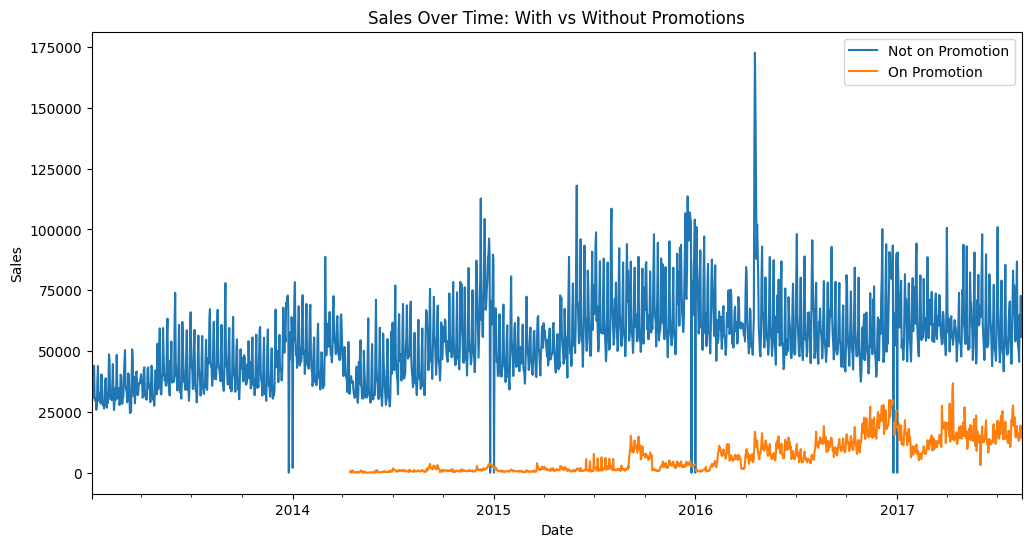

In [50]:
promo_sales = df_train.groupby(['date', 'onpromotion'])['unit_sales'].sum().unstack()
promo_sales.plot(figsize=(12, 6))
plt.title("Sales Over Time: With vs Without Promotions")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Not on Promotion", "On Promotion"])
plt.show()
#Understand impact of promotions on sales
#Use Case: Helps validate if promotions significantly lift demand (often the case in retail)